In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

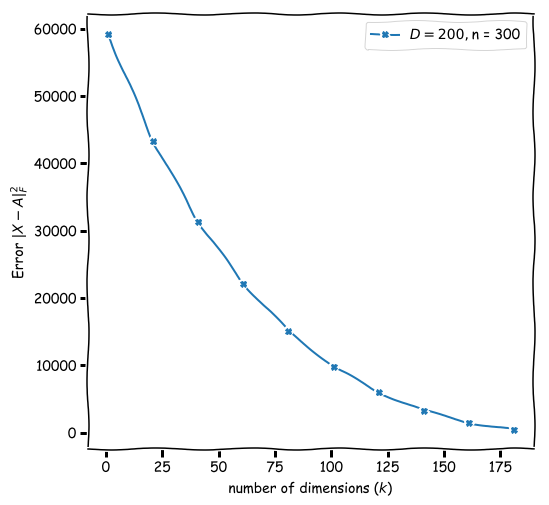

In [67]:
D = 200; n = 300
X = np.random.normal(size=(D, n))
U, s, Vt = np.linalg.svd(X)
k = 5

k_range = range(1,D, 20)
errors = []
with plt.xkcd():
    fig = plt.figure(figsize=(8,8))
    plt.xlabel('number of dimensions ($k$)')
    plt.ylabel('Error $\|X - A\|_F^2$')
    for k in k_range:
        e = np.linalg.norm(X - (U[:,:k] @ np.diag(s[:k]) @ Vt[:k,:]), 'fro')**2
        errors.append(e)
    label = '$D = 200, $n = 300'
    plt.plot(k_range, errors, 'X-', label = label)
    plt.legend()
    plt.savefig('svd.jpg', format='jpg', dpi=300) 

In [2]:
def JL_dim(n, ϵ):
    return 4*np.log(n)/((ϵ**2)/2 - (ϵ**3)/3)

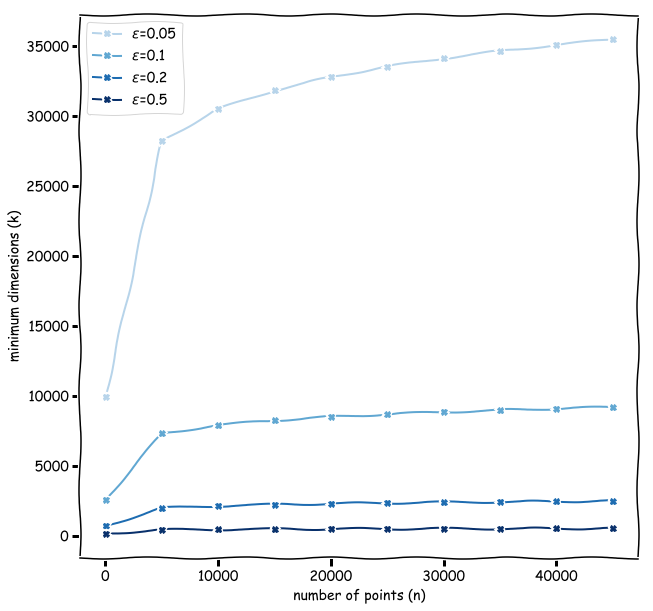

In [55]:
n_range = np.arange(20,50000,5000)
eps_range = np.array([0.05, 0.1, 0.2, 0.5])
colors = plt.cm.Blues(np.linspace(0.3, 1.0, len(eps_range)))
with plt.xkcd():
    fig = plt.figure(figsize=(10,10))
    plt.xlabel('number of points (n)')
    plt.ylabel('minimum dimensions (k)')
    for i, eps in enumerate(eps_range):
        string = '$\epsilon$='+str(eps)
        plt.plot(n_range, JL_dim(n_range, eps), 'X-', label=string, c=colors[i])
    plt.legend()
    plt.savefig('JL-dimensions.jpg', format='jpg', dpi=300) 

In [73]:
for n,k in zip((n_range), JL_dim(n_range, 0.01)):
    print(n, k)

20 241267.028743
5020 686269.950015
10020 741933.291917
15020 774534.598012
20020 797676.809627
25020 815632.009451
30020 830304.894378
35020 842712.048792
40020 853460.505353
45020 862941.915259


In [74]:
for n,k in zip((n_range), JL_dim(n_range, 0.1)):
    print(n, k)

20 2567.77052019
5020 7303.87303944
10020 7896.2900354
15020 8243.26107884
20020 8489.56033103
25020 8680.65495773
30020 8836.81637587
35020 8968.86394786
40020 9083.25823555
45020 9184.16752668
